### 1. Keras Sequential model:

In [1]:
"import librairies"
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

#### 1.1. Read in the data and explore:

In [2]:
# Read.
df=pd.read_csv('/content/data_boston.csv')

In [3]:
# View.
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Scale the X data use min max scaller and fit transform.
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(df)
scaler_data=pd.DataFrame(scaler.transform(df),columns=df.columns)
scaler_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [5]:
# Spit the data into training and testing.
x=scaler_data.loc[:,scaler_data.columns !='PRICE']
y=scaler_data['PRICE']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42)
X_model, X_valid, Y_model, Y_valid = train_test_split(x_train, y_train, test_size = 0.2)

#### 1.2. Define a Sequential model:

In [6]:
# Add layers on a Sequential object.
my_model1 = Sequential()
n_vars=x.shape[1]
my_model1.add(Dense(input_dim = n_vars, units = 1, activation="linear"))    # Add a output layer for linear regression.

In [7]:
# Summary of the model.
my_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Define the hyperparameters and optimizer:

In [8]:
# Hyperparameters.
n_epochs = 200
batch_size =64
learn_rate =0.01

In [9]:
# Define the optimizer and then compile.
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
adamm= Adam(lr=learn_rate)
my_model1.compile(loss='MSE', optimizer=adamm, metrics=["MSE"])

#### 1.4. Train the model and visualize the history:

In [11]:
# Train the model.
# verbose = 0 means no output. verbose = 1 to view the epochs.
history = my_model1.fit(X_model, Y_model, validation_data=(X_valid, Y_valid), epochs= 150,batch_size =64)

Epoch 1/150
6/6 [==============================] - 1s 48ms/step - loss: 0.9503 - MSE: 0.9503 - val_loss: 0.8727 - val_MSE: 0.8727
Epoch 2/150
6/6 [==============================] - 0s 9ms/step - loss: 0.8932 - MSE: 0.8932 - val_loss: 0.8194 - val_MSE: 0.8194
Epoch 3/150
6/6 [==============================] - 0s 9ms/step - loss: 0.8395 - MSE: 0.8395 - val_loss: 0.7696 - val_MSE: 0.7696
Epoch 4/150
6/6 [==============================] - 0s 9ms/step - loss: 0.7899 - MSE: 0.7899 - val_loss: 0.7225 - val_MSE: 0.7225
Epoch 5/150
6/6 [==============================] - 0s 11ms/step - loss: 0.7430 - MSE: 0.7430 - val_loss: 0.6780 - val_MSE: 0.6780
Epoch 6/150
6/6 [==============================] - 0s 9ms/step - loss: 0.6990 - MSE: 0.6990 - val_loss: 0.6375 - val_MSE: 0.6375
Epoch 7/150
6/6 [==============================] - 0s 8ms/step - loss: 0.6589 - MSE: 0.6589 - val_loss: 0.6002 - val_MSE: 0.6002
Epoch 8/150
6/6 [==============================] - 0s 10ms/step - loss: 0.6227 - MSE: 0.6227 - 

In [ ]:
# View the keys.


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

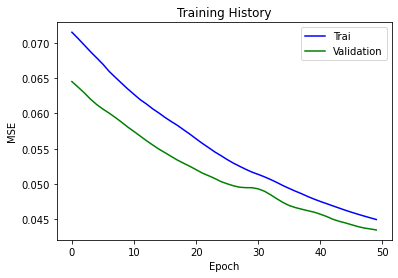

In [18]:
# Visualize the training history. 
n_skip = 100                 # Skip the first few steps.
plt.plot(history.history['MSE'][n_skip:], c="b")
plt.plot(history.history['val_MSE'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### 1.5. Testing: 

In [ ]:
# Predict and test using a formula.


5/5 [==============================] - 0s 2ms/step


5.64

In [ ]:
# Use the evaluate() method.


Test RMSE : 5.64
